Grupo: Péricles Buarque, Jorge Alexandre e João Luís

In [1937]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import numpy as np
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

In [1938]:
df = pd.read_csv('train.csv')

In [1939]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [1940]:
df = df.drop('black', axis=1)
df = df.drop('ID', axis=1)

In [1941]:
colum = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

In [1942]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [1943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  lstat    333 non-null    float64
 12  medv     333 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 33.9 KB


In [1944]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [1945]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


In [1946]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis     rad  tax  ptratio  lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     4.98   24.0    1
1.62864   0.0   21.89  0     0.624  5.019  100.0  1.4394  4    437  21.2     34.41  14.4    1
1.51902   0.0   19.58  1     0.605  8.375  93.9   2.1620  5    403  14.7     3.32   50.0    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709  5    403  14.7     1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659  5    403  14.7     7.39   23.3    1
                                                                                           ..
0.11460   20.0  6.96   0     0.464  6.538  58.7   3.9175  3    223  18.6     7.73   24.4    1
0.11432   0.0   8.56   0     0.520  6.781  71.3   2.8561  5    384  20.9     7.67   26.5    1
0.11329   30.0  4.93   0     0.428  6.897  54.3   6.3361  6    300  16.6     11.38  22.0    1
0.11132   0.0   27.74  0     0.609  5.983  83.5   2.1099  4    71

In [1947]:
#my_report = sv.analyze(df)
#my_report.show_html()

In [1948]:
corr_matrix = df.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.689598
zn         0.344842
dis        0.249422
chas       0.204390
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

<Axes: xlabel='rm', ylabel='medv'>

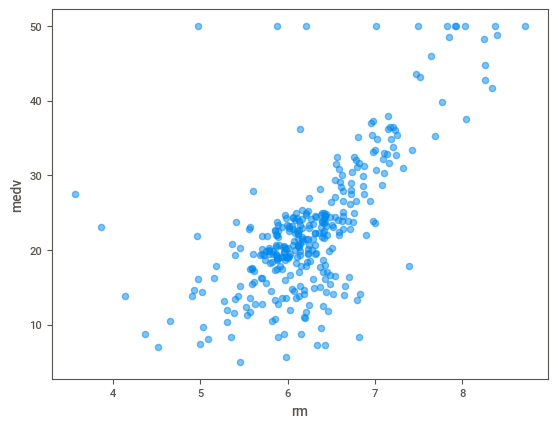

In [1949]:
df.plot(kind='scatter', x='rm', y='medv', alpha=0.5)

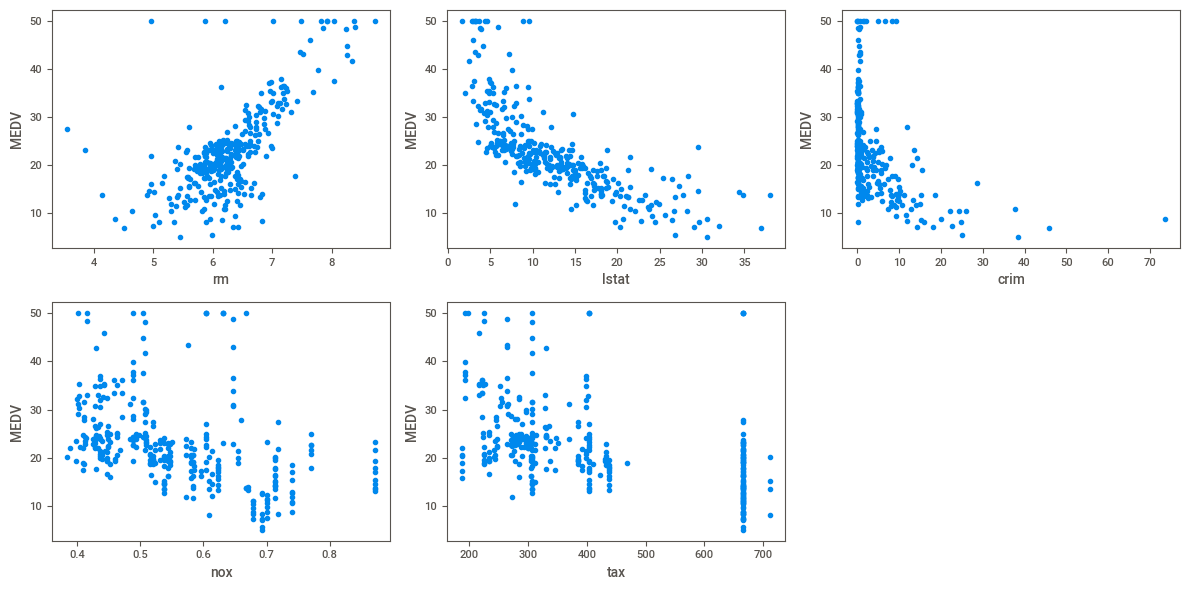

In [1950]:
# Escolhendo variáveis de entrada e saída
X = df[['rm', 'lstat', 'crim', 'nox', 'tax']]
y = df['medv']

# Plotando a dispersão
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], y, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

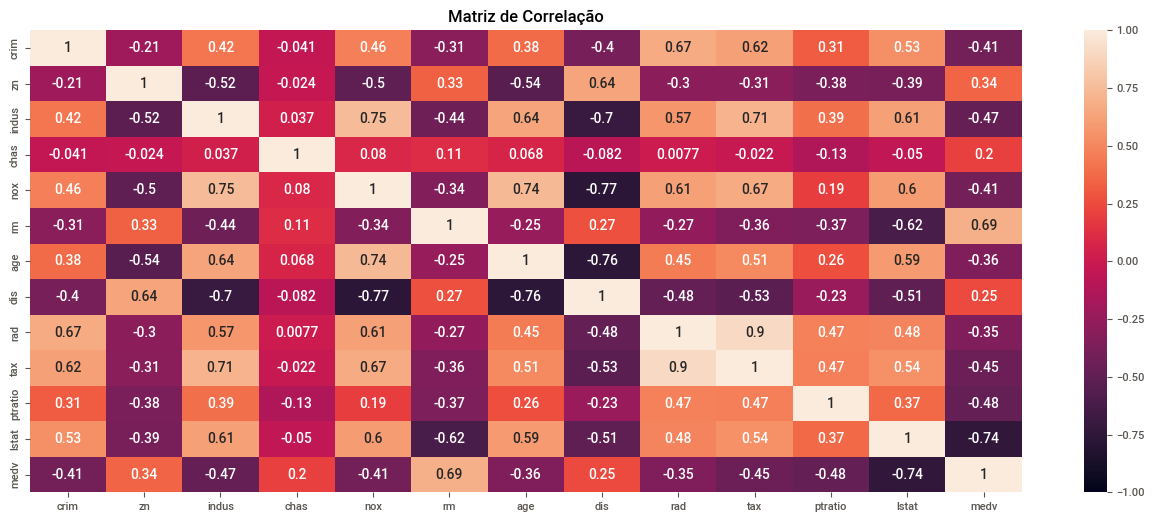

In [1951]:
plt.figure(figsize=(16, 6))
heatmap = sns. heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Matriz de Correlação')
plt.show()


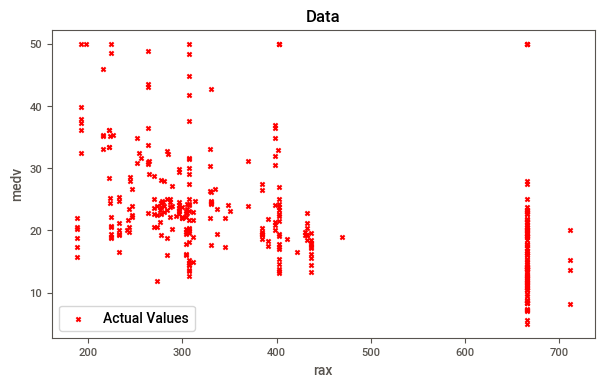

In [1952]:
x = np.array(df['tax'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('medv')
# Set the x-axis label
plt.xlabel('rax')
plt.legend()
plt.show()

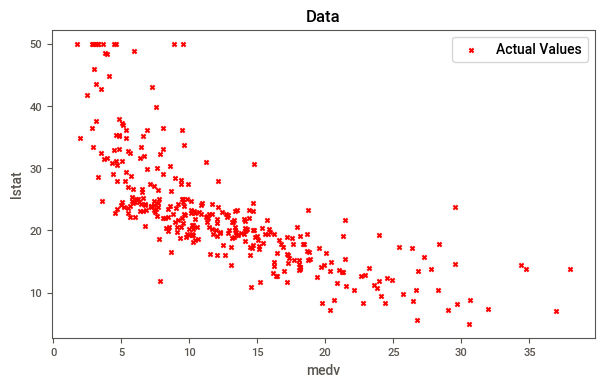

In [1953]:
x = np.array(df['lstat'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('lstat')
# Set the x-axis label
plt.xlabel('medv')
plt.legend()
plt.show()

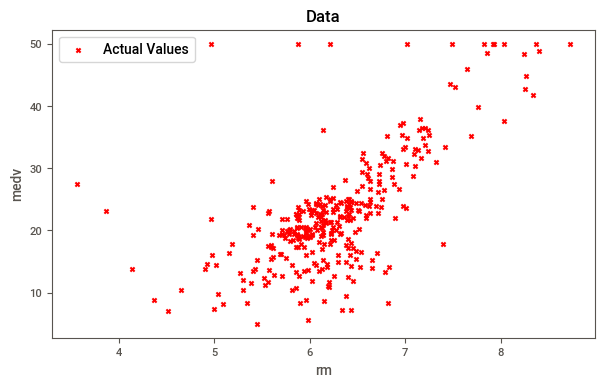

In [1954]:
x = np.array(df['rm'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('medv')
# Set the x-axis label
plt.xlabel('rm')
plt.legend()
plt.show()

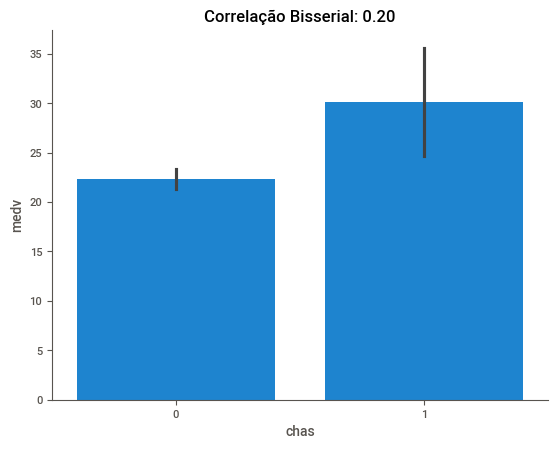

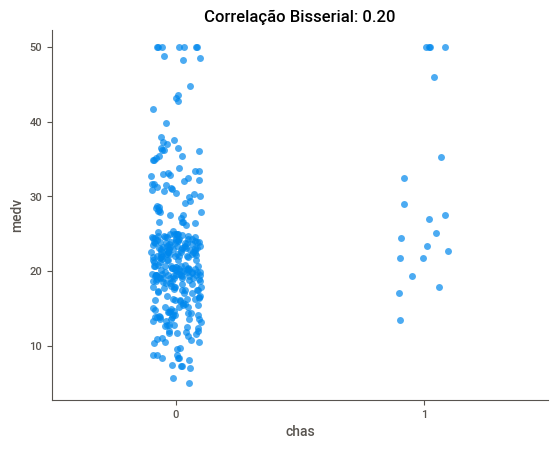

In [1955]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['chas'], df['medv'])

# Plotando um gráfico de barra para visualizar a correlação bisserial
sns.barplot(x='chas', y='medv', data=df)
sns.despine()
plt.title(f'Correlação Bisserial: {correlation:.2f}')
plt.show()

# Plotando um gráfico de dispersão para visualizar a correlação bisserial
sns.stripplot(x='chas', y='medv', data=df, jitter=True, alpha=0.7)
sns.despine()
plt.title(f'Correlação Bisserial: {correlation:.2f}')
plt.show()


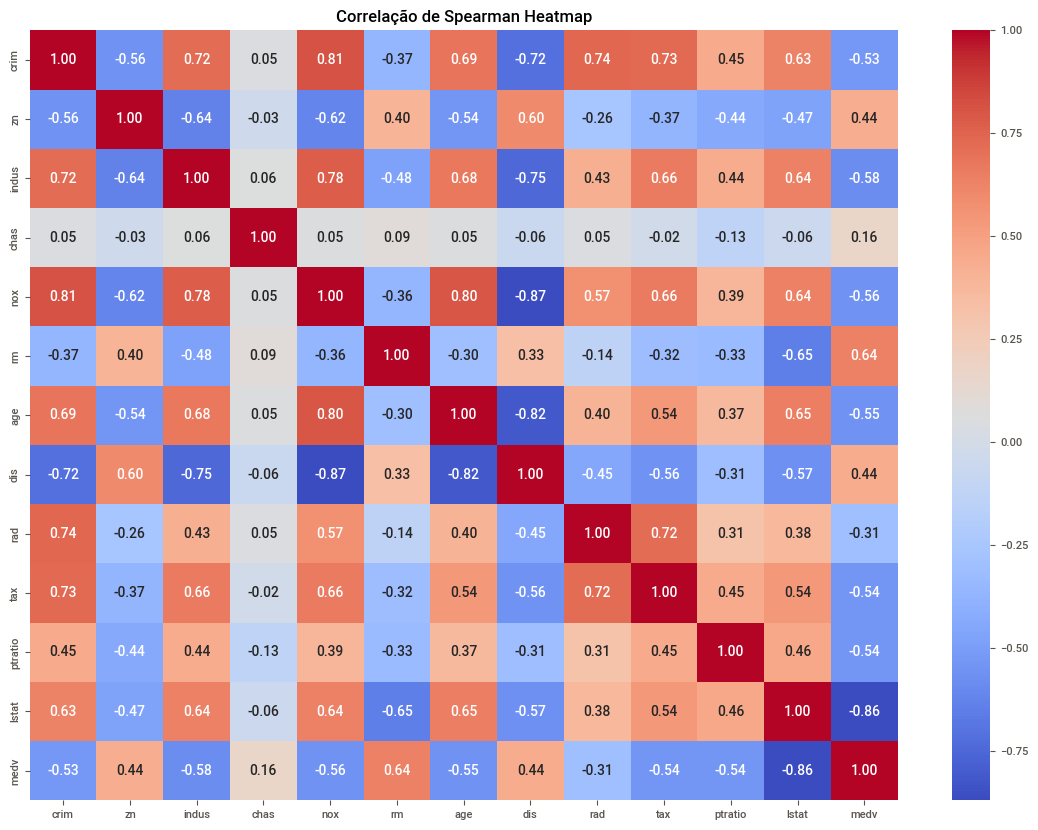

In [1956]:
correlation_matrix = df.corr(method='spearman')

# Plotando o heatmap da correlação de Spearman
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman Heatmap')
plt.show()

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

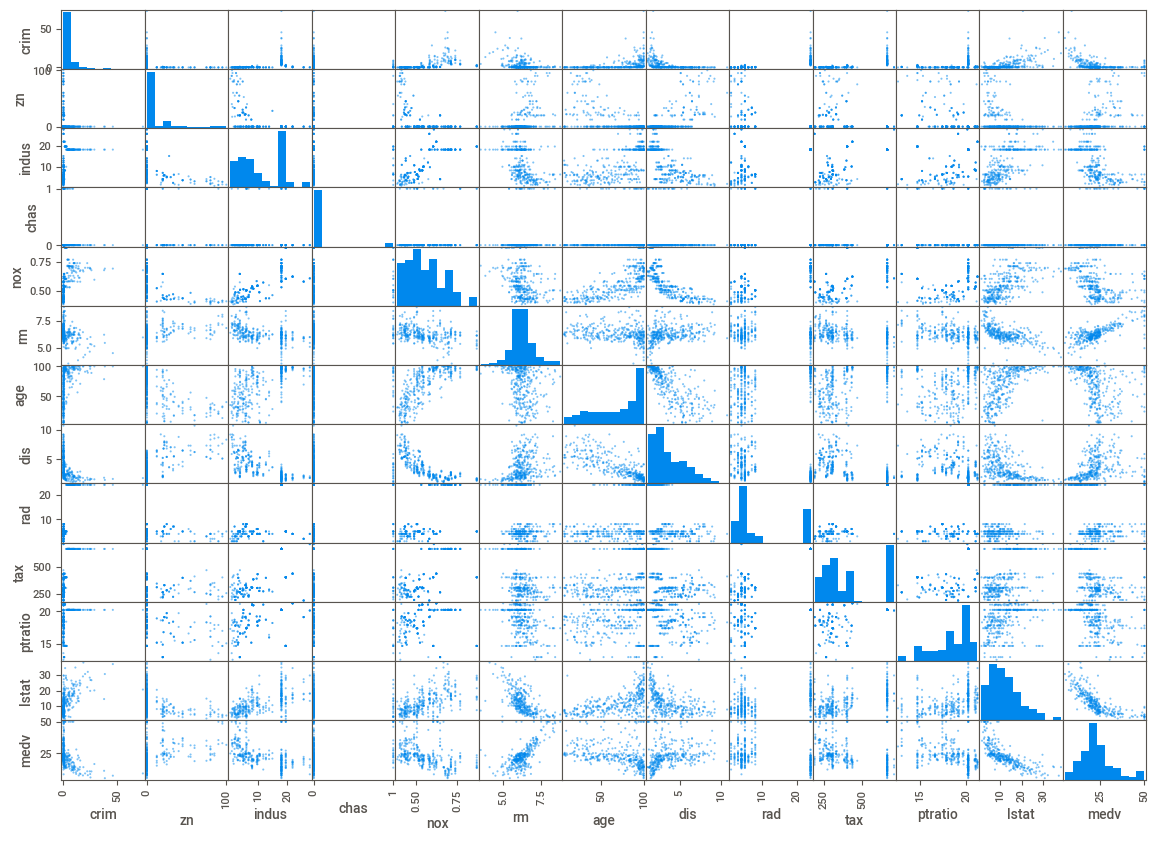

In [1957]:
scatter_matrix(df[colum], figsize=(14,10))

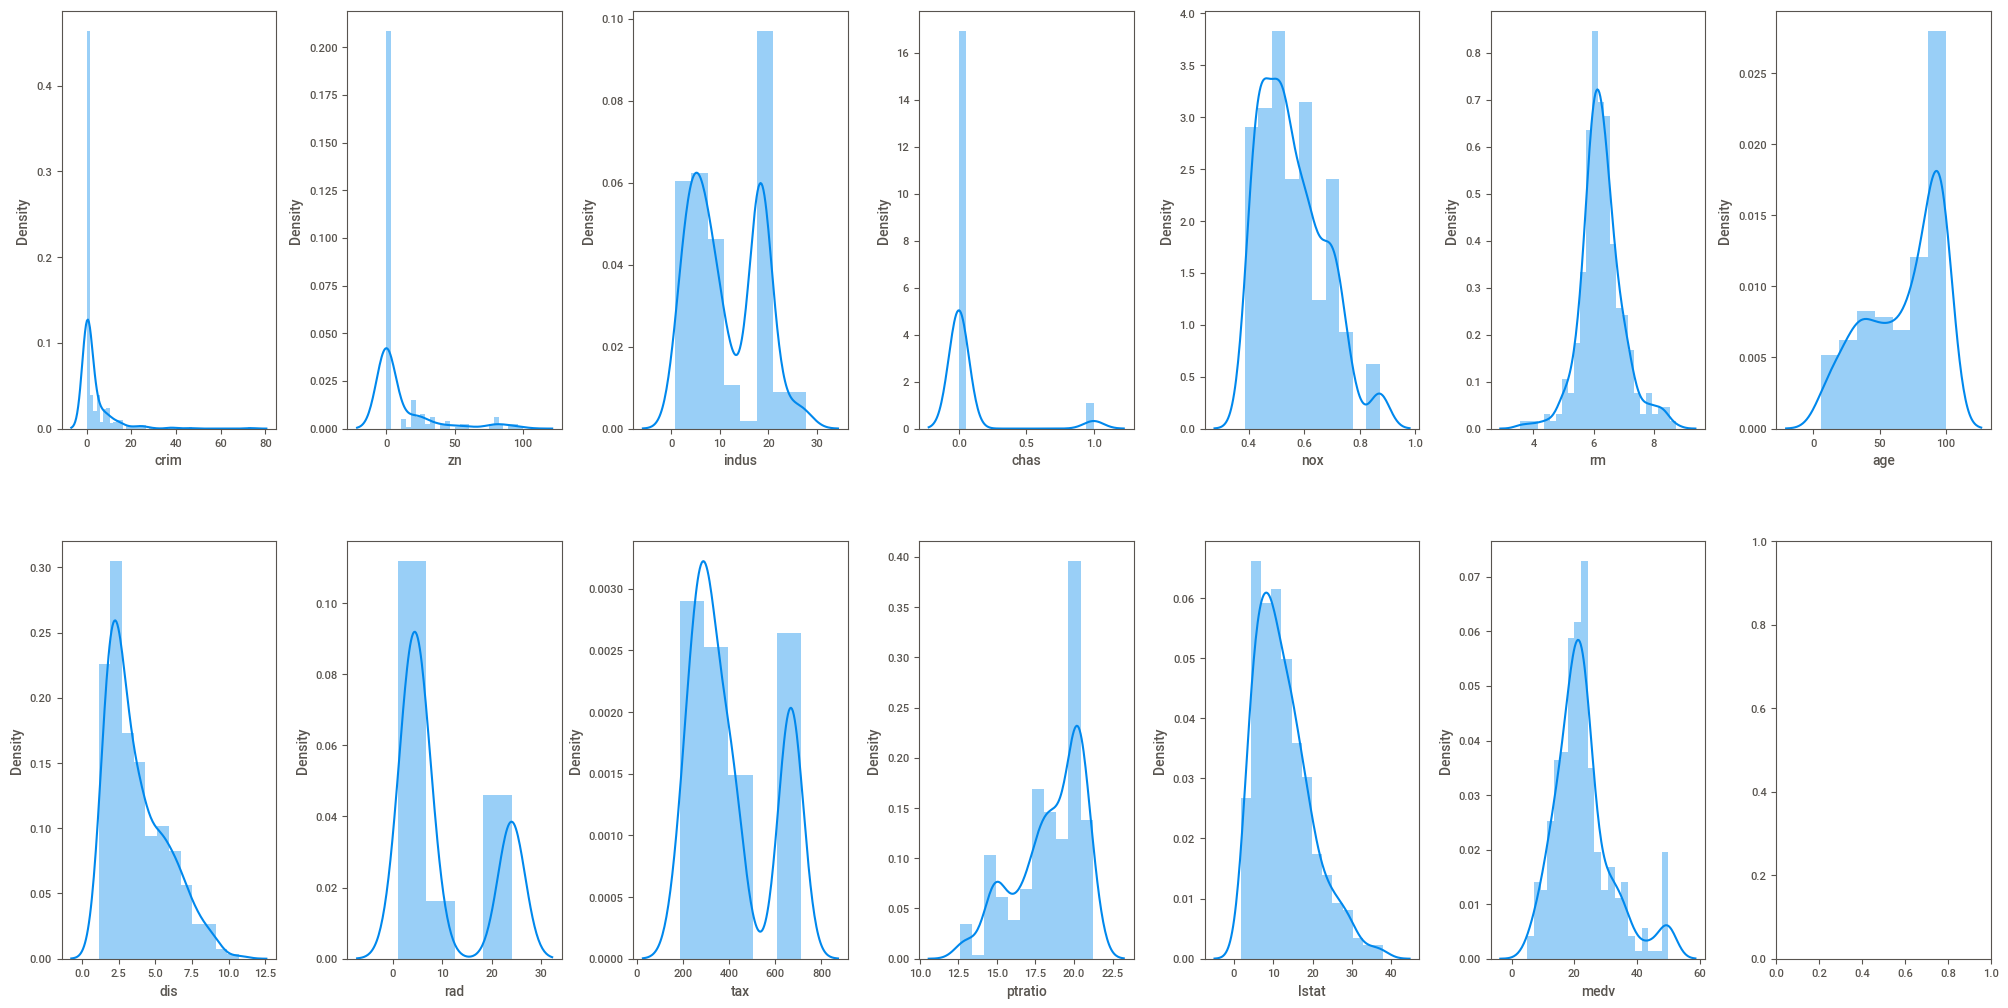

In [1958]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [1959]:
'''features = df[colum]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(data=scaled_features, columns=colum)

print("DataFrame Normalizado (MinMaxScaler):")
print(df_scaled)
'''
df_scaled = df

# Holdout total

In [1960]:
X = df_scaled.drop(columns=['medv']).values
y = df_scaled['medv'].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [1961]:
X_treinamento

array([[5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.24000e+02,
        2.02000e+01, 9.74000e+00],
       [1.50980e-01, 0.00000e+00, 1.00100e+01, ..., 4.32000e+02,
        1.78000e+01, 1.03000e+01],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 1.81300e+01],
       ...,
       [1.34284e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
        1.47000e+01, 6.43000e+00],
       [2.59406e+01, 0.00000e+00, 1.81000e+01, ..., 6.66000e+02,
        2.02000e+01, 2.66400e+01],
       [1.65660e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
        1.47000e+01, 1.41000e+01]])

# Regressão Linear Simples 1 variável

## Holdout 1 variável

In [1962]:
X1 = df_scaled['rm'].values
y1 = df_scaled['medv'].values
X_treinamento1, X_teste1, y_treinamento1, y_teste1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [1963]:

X_treinamento1=X_treinamento1.reshape(-1, 1)
y_treinamento1=y_treinamento1.reshape(-1, 1)
X_teste1=X_teste1.reshape(-1, 1)
y_teste1=y_teste1.reshape(-1, 1)


In [1964]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Criando o modelo de regressão linear simples
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_treinamento1, y_treinamento1)

# Fazendo previsões nos dados de treinamento e teste
y_train_pred = regressor.predict(X_treinamento1)
y_test_pred = regressor.predict(X_teste1)

# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento1, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento1, y_train_pred))

# Avaliando o modelo nos dados de teste
print('MSE nos dados de teste:', mean_squared_error(y_teste1, y_test_pred))
print('R² nos dados de teste:', r2_score(y_teste1, y_test_pred))


MSE nos dados de treinamento: 46.02988251954457
R² nos dados de treinamento: 0.4408036085144994
MSE nos dados de teste: 36.361622515889756
R² nos dados de teste: 0.5959747117709422


# Regressão Linear Simples

## Holdout Parcial

In [1965]:
X = df_scaled.drop(columns=['chas', 'dis', 'zn', 'rad', 'age', 'crim', 'nox', 'medv']).values # Colunas utilizadas: ['rm', 'lstat']
y = df_scaled['medv'].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [1966]:
corr_matrix = df.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.689598
zn         0.344842
dis        0.249422
chas       0.204390
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

In [1967]:
from sklearn.metrics import mean_squared_error, r2_score
# Criando o modelo de regressão linear simples
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_treinamento, y_treinamento)

# Fazendo previsões nos dados de treinamento e teste
y_train_pred = regressor.predict(X_treinamento)
y_test_pred = regressor.predict(X_teste)

# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento, y_train_pred))

# Avaliando o modelo nos dados de teste
print('MSE nos dados de teste:', mean_squared_error(y_teste, y_test_pred))
print('R² nos dados de teste:', r2_score(y_teste, y_test_pred))

MSE nos dados de treinamento: 31.415615828341824
R² nos dados de treinamento: 0.6370520221538647
MSE nos dados de teste: 20.95261072057401
R² nos dados de teste: 0.7266284051453786


## Kfold

In [1968]:
num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
modelo_linear = LinearRegression()
resultados = cross_val_score(modelo_linear, X_treinamento, y_treinamento, cv=kf)

print("Resultados da validação cruzada:", resultados)
print("Precisão média:", resultados.mean())


# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento, y_train_pred))

Resultados da validação cruzada: [0.45785884 0.38579405 0.62857484 0.44077821 0.15381697 0.66303701
 0.77571329 0.72432665 0.8235461  0.79097089]
Precisão média: 0.5844416864868605
MSE nos dados de treinamento: 31.415615828341824
R² nos dados de treinamento: 0.6370520221538647


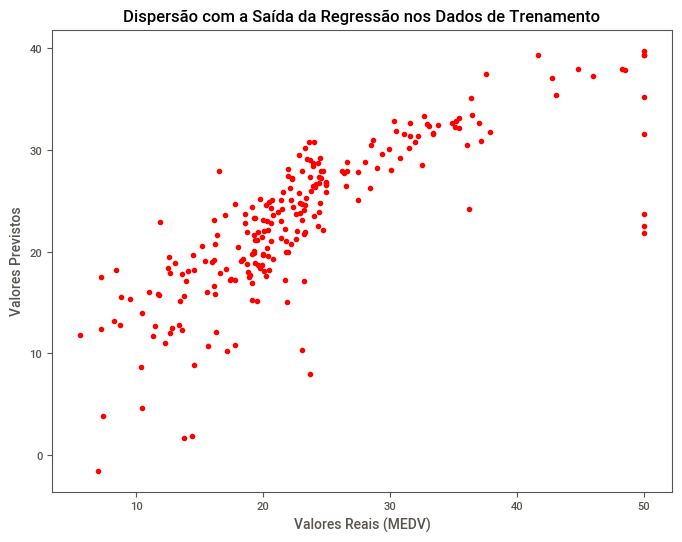

In [1969]:
plt.figure(figsize=(8, 6))
plt.scatter(y_treinamento, y_train_pred, color='red')
plt.xlabel('Valores Reais (MEDV)')
plt.ylabel('Valores Previstos')
plt.title('Dispersão com a Saída da Regressão nos Dados de Trenamento')
plt.show()

In [1970]:
num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
modelo_linear = LinearRegression()
resultados = cross_val_score(modelo_linear, X_teste, y_teste, cv=kf)

print("Resultados da validação cruzada:", resultados)
print("Precisão média:", resultados.mean())


# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_teste, y_test_pred))
print('R² nos dados de treinamento:', r2_score(y_teste, y_test_pred))

Resultados da validação cruzada: [ 0.76559514 -0.36337391  0.36744501  0.87399683  0.79894592  0.26184883
  0.85932432 -0.89448979  0.7217987   0.64846099]
Precisão média: 0.40395520313099514
MSE nos dados de treinamento: 20.95261072057401
R² nos dados de treinamento: 0.7266284051453786


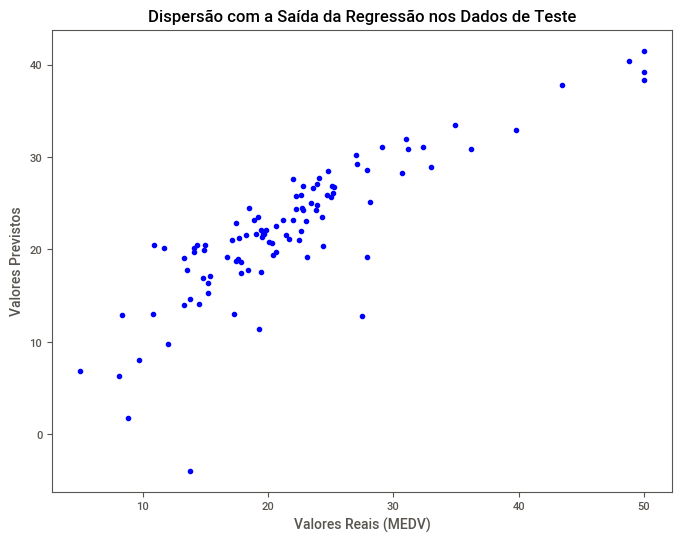

In [1971]:
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_test_pred, color='blue')
plt.xlabel('Valores Reais (MEDV)')
plt.ylabel('Valores Previstos')
plt.title('Dispersão com a Saída da Regressão nos Dados de Teste')
plt.show()

## Lasso com Kfold

In [1972]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []
# Iterando sobre os folds
for train_index, test_index in kf.split(X_treinamento):
    X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
    y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
    
    # Criando e treinando o modelo de Regressão Lasso (L1)
    lasso_reg = Lasso(alpha=0.1)  # O parâmetro alpha controla a força da regularização
    lasso_reg.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = lasso_reg.predict(X_val)
    
    # Calculando o erro (MSE) no conjunto de validação e armazenando
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)


# Calculando a média dos MSEs de todos os folds
average_mse = np.mean(mse_scores)
print("Média do Erro (MSE) na Regressão Lasso com k-fold Cross-Validation:", average_mse)

# Calculando a média dos R2 de todos os folds
average_r2 = np.mean(r2_scores)
print("Média do R2 na Regressão Lasso com k-fold Cross-Validation:", average_r2)


Média do Erro (MSE) na Regressão Lasso com k-fold Cross-Validation: 35.277817781525904
Média do R2 na Regressão Lasso com k-fold Cross-Validation: 0.5765917177939832


In [1973]:
from sklearn.linear_model import Ridge

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []
# Iterando sobre os folds
for train_index, test_index in kf.split(X_treinamento):
    X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
    y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
    
    # Criando e treinando o modelo de Regressão Ridge (L2)
    ridge_reg = Ridge(alpha=1.0)  # O parâmetro alpha controla a força da regularização
    ridge_reg.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = ridge_reg.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)

    mse_scores.append(mse)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)  # Adiciona o R^2 à lista de resultados

# Calculando a média dos MSEs de todos os folds
average_mse = np.mean(mse_scores)

print("Média do Erro (MSE) na Regressão Ridge com k-fold Cross-Validation:", average_mse)
average_r2 = np.mean(r2_scores)
print("Média do R^2 na Regressão Ridge com k-fold Cross-Validation:", average_r2)



Média do Erro (MSE) na Regressão Ridge com k-fold Cross-Validation: 35.21711345954883
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.5757285382359024


# Regressão polinomial

# Kfold

In [1974]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []

degrees = [1,2,3,4,5,10]

for d in degrees:
# Iterando sobre os folds
    for train_index, test_index in kf.split(X_treinamento):
        X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
        y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
        
        model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
            ("lin_reg", Ridge())
        ])
        model.fit(X_train, y_train)
        
        # Fazendo previsões no conjunto de validação
        y_pred = model.predict(X_val)
        
        # Calculando o erro (MSE) no conjunto de validação e armazenando
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)  # Adiciona o R^2 à lista de resultados

# Calculando a média dos MSEs de todos os folds
    average_mse = np.mean(mse_scores)
    print("Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation:", average_mse)
    average_r2 = np.mean(r2_scores)
    print("Média do R^2 na Regressão Ridge com k-fold Cross-Validation:", average_r2)


Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation:

 35.21711345954883
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.5757285382359024
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 26.02717667975171
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.6788008982151336
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 45.63396013555641
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.5371236157041872
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 1254.826765591008
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: -7.454693911980914
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 1674.6837203409405
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: -10.440977683790328
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 204366.88794152378
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: -1286.755610295955


In [1975]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import Pipeline

# Graus polinomiais que você deseja testar
graus = [1, 2, 3, 4, 5]

# Iterando sobre os diferentes graus
for grau in graus:
    # Criando o modelo de Regressão Polinomial com o grau atual
    modelo = Pipeline([
        ("poly_features", PolynomialFeatures(degree=grau, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    
    # Fazendo previsões usando cross_val_predict com k-fold=10
    y_pred = cross_val_predict(modelo, X_treinamento, y_treinamento, cv=10)
    
    # Calculando o MSE
    mse = mean_squared_error(y_treinamento, y_pred)
    
    # Calculando o R^2 score manualmente
    r2 = r2_score(y_treinamento, y_pred)
    
    # Imprimindo o resultado
    print(f"Grau {grau}: MSE: {mse:.4f}, R² Score: {r2:.4f}")


Grau 1: MSE: 34.9841, R² Score: 0.5958
Grau 2: MSE: 17.9793, R² Score: 0.7923
Grau 3: MSE: 97.3691, R² Score: -0.1249
Grau 4: MSE: 2704.8086, R² Score: -30.2489
Grau 5: MSE: 5731268993.3873, R² Score: -66213964.1506


## Procurando o melhor valor de alpha

In [1976]:
from sklearn.model_selection import GridSearchCV

graus = [1, 2, 3, 4]
kff = 3

for grau in graus:
    # Crie o modelo polinomial
    poly_features = PolynomialFeatures(degree=grau, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_treinamento)
    X_test_poly = poly_features.transform(X_teste)
    
    # Defina os valores de alpha que você deseja testar
    parametros_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
    parametros_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
    
    # Encontre o melhor valor de alpha para o modelo Ridge usando GridSearchCV
    grid_search_ridge = GridSearchCV(Ridge(), parametros_ridge, cv=kff, scoring='r2')
    grid_search_ridge.fit(X_train_poly, y_treinamento)
    
    # Encontre o melhor valor de alpha para o modelo Lasso usando GridSearchCV
    grid_search_lasso = GridSearchCV(Lasso(), parametros_lasso, cv=kff, scoring='r2')
    grid_search_lasso.fit(X_train_poly, y_treinamento)
    
    # Obtenha os melhores modelos encontrados
    melhor_modelo_ridge = grid_search_ridge.best_estimator_
    melhor_modelo_lasso = grid_search_lasso.best_estimator_
    
    # Faça previsões usando os melhores modelos
    y_pred_ridge = melhor_modelo_ridge.predict(X_test_poly)
    y_pred_lasso = melhor_modelo_lasso.predict(X_test_poly)
    
    # Calcule R² scores e MSE para os melhores modelos
    r2_ridge = r2_score(y_teste, y_pred_ridge)
    mse_ridge = mean_squared_error(y_teste, y_pred_ridge)
    
    r2_lasso = r2_score(y_teste, y_pred_lasso)
    mse_lasso = mean_squared_error(y_teste, y_pred_lasso)
    
    # Imprima os resultados
    print(f"Modelo Polinomial (Grau {grau}):")
    print(f"Melhor Modelo Ridge: R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}, Melhor Alpha: {melhor_modelo_ridge.alpha}")
    print(f"Melhor Modelo Lasso: R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, Melhor Alpha: {melhor_modelo_lasso.alpha}")
    print("")


Modelo Polinomial (Grau 1):
Melhor Modelo Ridge: R² Score: 0.7267, MSE: 20.9501, Melhor Alpha: 0.1
Melhor Modelo Lasso: R² Score: 0.7267, MSE: 20.9494, Melhor Alpha: 0.01

Modelo Polinomial (Grau 2):
Melhor Modelo Ridge: R² Score: 0.8518, MSE: 11.3551, Melhor Alpha: 10
Melhor Modelo Lasso: R² Score: 0.8610, MSE: 10.6568, Melhor Alpha: 1

Modelo Polinomial (Grau 3):
Melhor Modelo Ridge: R² Score: 0.7628, MSE: 18.1829, Melhor Alpha: 100
Melhor Modelo Lasso: R² Score: 0.8334, MSE: 12.7694, Melhor Alpha: 0.01

Modelo Polinomial (Grau 4):
Melhor Modelo Ridge: R² Score: -19.3185, MSE: 1557.3156, Melhor Alpha: 100
Melhor Modelo Lasso: R² Score: 0.8137, MSE: 14.2798, Melhor Alpha: 100



In [1977]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Defina o grau do polinômio
grau = 2

# Crie o modelo polinomial
poly_features = PolynomialFeatures(degree=grau, include_bias=False)
elasticnet = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1, max_iter=1000,
                        positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
# Crie o pipeline com PolynomialFeatures, StandardScaler e ElasticNet
pipeline = Pipeline([
    ("polynomial_features", poly_features),
    ("elastic_net", elasticnet)
])

# Treine o modelo
pipeline.fit(X_treinamento, y_treinamento)

# Faça previsões usando o modelo treinado
y_pred = pipeline.predict(X_teste)

# Calcule R² score e MSE para o modelo treinado
r2 = r2_score(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)

# Imprima os resultados
print(f"Modelo Polinomial (Grau {grau}):")
print(f"Melhor Modelo ElasticNet: R² Score: {r2:.4f}, MSE: {mse:.4f}")


Modelo Polinomial (Grau 2):
Melhor Modelo ElasticNet: R² Score: 0.8387, MSE: 12.3621


In [1978]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Lista de graus polinomiais a serem testados
graus = [1, 2, 3]

# Lista de valores de kff a serem testados
kff_values = [4, 5,10]

for grau in graus:
    for kff in kff_values:
        # Crie o modelo polinomial
        poly_features = PolynomialFeatures(degree=grau, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_treinamento)
        X_test_poly = poly_features.transform(X_teste)
        
        # Defina os valores de alpha que você deseja testar
        parametros_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
        parametros_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
        
        # Encontre o melhor valor de alpha para o modelo Ridge usando GridSearchCV
        grid_search_ridge = GridSearchCV(Ridge(), parametros_ridge, cv=kff, scoring='r2')
        grid_search_ridge.fit(X_train_poly, y_treinamento)
        
        # Encontre o melhor valor de alpha para o modelo Lasso usando GridSearchCV
        grid_search_lasso = GridSearchCV(Lasso(), parametros_lasso, cv=kff, scoring='r2')
        grid_search_lasso.fit(X_train_poly, y_treinamento)
        
        # Obtenha os melhores modelos encontrados
        melhor_modelo_ridge = grid_search_ridge.best_estimator_
        melhor_modelo_lasso = grid_search_lasso.best_estimator_
        
        # Faça previsões usando os melhores modelos
        y_pred_ridge = melhor_modelo_ridge.predict(X_test_poly)
        y_pred_lasso = melhor_modelo_lasso.predict(X_test_poly)
        
        # Calcule R² scores e MSE para os melhores modelos
        r2_ridge = r2_score(y_teste, y_pred_ridge)
        mse_ridge = mean_squared_error(y_teste, y_pred_ridge)
        
        r2_lasso = r2_score(y_teste, y_pred_lasso)
        mse_lasso = mean_squared_error(y_teste, y_pred_lasso)
        
        # Imprima os resultados
        print(f"Modelo Polinomial (Grau {grau}) - kff: {kff}:")
        print(f"Melhor Modelo Ridge: R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}, Melhor Alpha: {melhor_modelo_ridge.alpha}")
        print(f"Melhor Modelo Lasso: R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, Melhor Alpha: {melhor_modelo_lasso.alpha}")
        print("")


Modelo Polinomial (Grau 1) - kff: 4:
Melhor Modelo Ridge: R² Score: 0.7269, MSE: 20.9295, Melhor Alpha: 1
Melhor Modelo Lasso: R² Score: 0.7265, MSE: 20.9615, Melhor Alpha: 0.1

Modelo Polinomial (Grau 1) - kff: 5:
Melhor Modelo Ridge: R² Score: 0.7269, MSE: 20.9295, Melhor Alpha: 1
Melhor Modelo Lasso: R² Score: 0.7265, MSE: 20.9615, Melhor Alpha: 0.1

Modelo Polinomial (Grau 1) - kff: 10:
Melhor Modelo Ridge: R² Score: 0.7278, MSE: 20.8617, Melhor Alpha: 10
Melhor Modelo Lasso: R² Score: 0.7265, MSE: 20.9615, Melhor Alpha: 0.1

Modelo Polinomial (Grau 2) - kff: 4:
Melhor Modelo Ridge: R² Score: 0.8559, MSE: 11.0480, Melhor Alpha: 100
Melhor Modelo Lasso: R² Score: 0.8610, MSE: 10.6568, Melhor Alpha: 1

Modelo Polinomial (Grau 2) - kff: 5:
Melhor Modelo Ridge: R² Score: 0.8559, MSE: 11.0480, Melhor Alpha: 100
Melhor Modelo Lasso: R² Score: 0.8610, MSE: 10.6568, Melhor Alpha: 1

Modelo Polinomial (Grau 2) - kff: 10:
Melhor Modelo Ridge: R² Score: 0.8396, MSE: 12.2945, Melhor Alpha: 1
M

In [1979]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Lista de graus polinomiais a serem testados
graus = [1, 2, 3]

# Lista de valores de kff a serem testados
kff_values = [3,4, 5, 10]

for grau in graus:
    for kff in kff_values:
        # Crie o modelo polinomial
        poly_features = PolynomialFeatures(degree=grau, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_treinamento)
        X_test_poly = poly_features.transform(X_teste)
        
        # Defina os valores de alpha e l1_ratio que você deseja testar para Elastic Net
        parametros_elasticnet = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
        
        # Encontre os melhores valores de alpha e l1_ratio para o modelo Elastic Net usando GridSearchCV
        grid_search_elasticnet = GridSearchCV(ElasticNet(), parametros_elasticnet, cv=kff, scoring='r2')
        grid_search_elasticnet.fit(X_train_poly, y_treinamento)
        
        # Obtenha o melhor modelo Elastic Net encontrado
        melhor_modelo_elasticnet = grid_search_elasticnet.best_estimator_
        
        # Faça previsões usando o melhor modelo Elastic Net
        y_pred_elasticnet = melhor_modelo_elasticnet.predict(X_test_poly)
        
        # Calcule R² score e MSE para o melhor modelo Elastic Net
        r2_elasticnet = r2_score(y_teste, y_pred_elasticnet)
        mse_elasticnet = mean_squared_error(y_teste, y_pred_elasticnet)
        
        # Imprima os resultados para Elastic Net
        print(f"Modelo Polinomial (Grau {grau}) - kff: {kff} - Elastic Net:")
        print(f"Melhor Modelo Elastic Net: R² Score: {r2_elasticnet:.4f}, MSE: {mse_elasticnet:.4f}, Melhor Alpha: {melhor_modelo_elasticnet.alpha}, Melhor l1_ratio: {melhor_modelo_elasticnet.l1_ratio}")
        print("")


Modelo Polinomial (Grau 1) - kff: 3 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.7267, MSE: 20.9443, Melhor Alpha: 0.01, Melhor l1_ratio: 0.9

Modelo Polinomial (Grau 1) - kff: 4 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.7272, MSE: 20.9085, Melhor Alpha: 0.01, Melhor l1_ratio: 0.1

Modelo Polinomial (Grau 1) - kff: 5 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.7268, MSE: 20.9424, Melhor Alpha: 0.1, Melhor l1_ratio: 0.9

Modelo Polinomial (Grau 1) - kff: 10 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.7269, MSE: 20.9288, Melhor Alpha: 0.1, Melhor l1_ratio: 0.7

Modelo Polinomial (Grau 2) - kff: 3 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.8612, MSE: 10.6381, Melhor Alpha: 1, Melhor l1_ratio: 0.9

Modelo Polinomial (Grau 2) - kff: 4 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.8612, MSE: 10.6381, Melhor Alpha: 1, Melhor l1_ratio: 0.9

Modelo Polinomial (Grau 2) - kff: 5 - Elastic Net:
Melhor Modelo Elastic Net: R² Score: 0.8612,

Melhor Grau encontrado foi o 3, utilizando o valor 0.1 de alpha com a regularização Ridge

# Modelo final

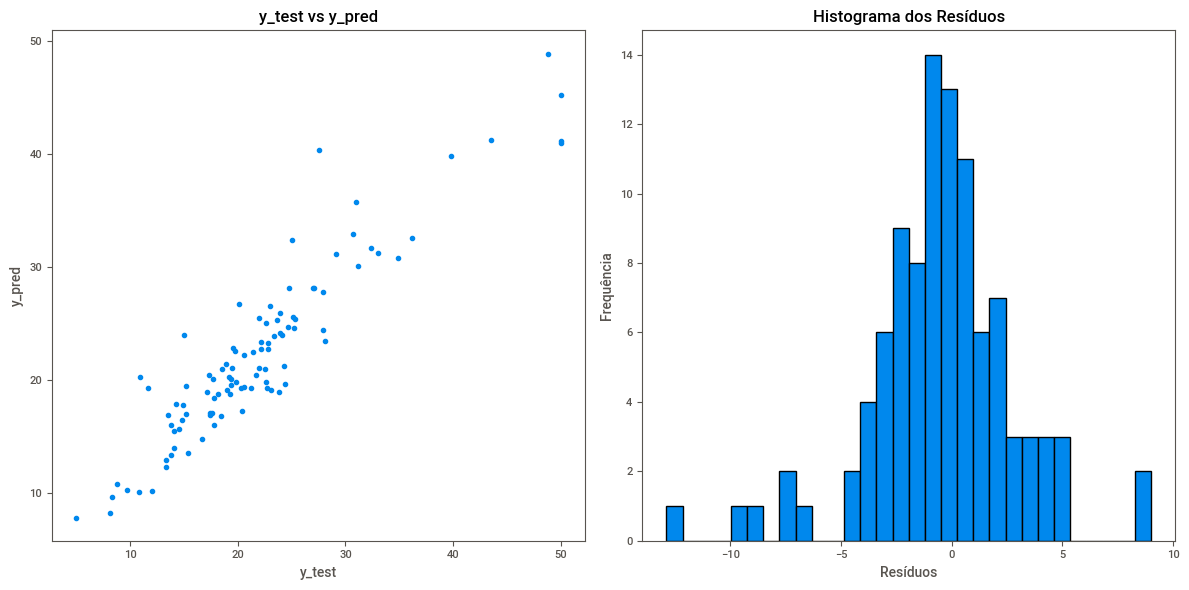

MSE: 11.0480
R²: 0.8559
R² Ajustado: 0.8194


In [1980]:
# Criando características polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_treinamento_poly = poly_features.fit_transform(X_treinamento)
X_teste_poly = poly_features.transform(X_teste)

# Criando e treinando o modelo de Regressão Ridge
alpha = 100  # Escolha um valor adequado para o parâmetro de regularização
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_treinamento_poly, y_treinamento)

# Fazendo previsões nos dados de teste
y_test_pred = ridge_reg.predict(X_teste_poly)

# Calculando as métricas de erro
mse = mean_squared_error(y_teste, y_test_pred)
r2 = r2_score(y_teste, y_test_pred)

# Calculando R² Ajustado
n = X_teste_poly.shape[0] # número de observações de teste
p = X_teste_poly.shape[1] # número de features
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Visualizando os resíduos
plt.figure(figsize=(12, 6))

# Gráfico y_test vs y_pred
plt.subplot(1, 2, 1)
plt.scatter(y_teste, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')

# Histograma dos resíduos
residuos = y_teste - y_test_pred
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

plt.tight_layout()
plt.show()

# Imprimindo as métricas
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')
print(f'R² Ajustado: {r2_ajustado:.4f}')


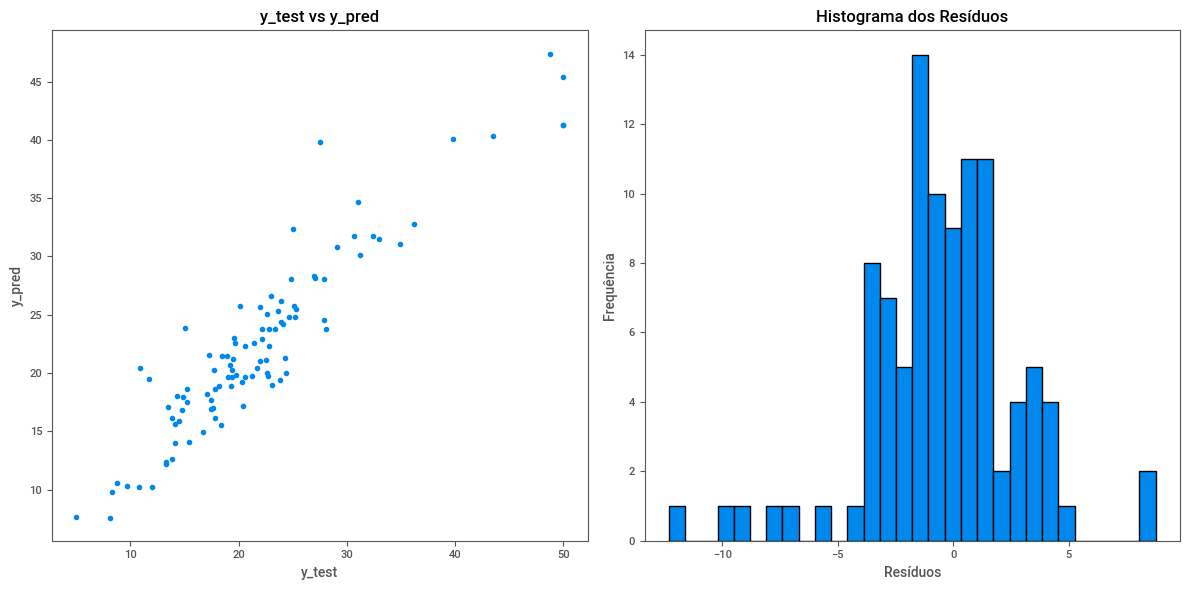

MSE: 10.6568
R²: 0.8610
R² Ajustado: 0.8258


In [1981]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Criando características polinomiais de grau 3
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_treinamento_poly = poly_features.fit_transform(X_treinamento)
X_teste_poly = poly_features.transform(X_teste)

# Criando e treinando o modelo de Regressão Lasso
alpha = 1  # Escolha um valor adequado para o parâmetro de regularização
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_treinamento_poly, y_treinamento)

# Fazendo previsões nos dados de teste
y_test_pred = lasso_reg.predict(X_teste_poly)

# Calculando as métricas de erro
mse = mean_squared_error(y_teste, y_test_pred)
r2 = r2_score(y_teste, y_test_pred)

# Calculando R² Ajustado
n = X_teste_poly.shape[0]  # número de observações de teste
p = X_teste_poly.shape[1]  # número de features
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Visualizando os resíduos
plt.figure(figsize=(12, 6))

# Gráfico y_test vs y_pred
plt.subplot(1, 2, 1)
plt.scatter(y_teste, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')

# Histograma dos resíduos
residuos = y_teste - y_test_pred
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

plt.tight_layout()
plt.show()

# Imprimindo as métricas
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')
print(f'R² Ajustado: {r2_ajustado:.4f}')


In [1982]:
for real, predito in zip(y_teste, y_test_pred):
    print(f'Valor Real: {real:.2f} - Valor Predito: {predito:.2f}')


Valor Real: 24.70 - Valor Predito: 24.85
Valor Real: 19.60 - Valor Predito: 22.98
Valor Real: 19.80 - Valor Predito: 19.82
Valor Real: 27.90 - Valor Predito: 28.07
Valor Real: 23.90 - Valor Predito: 24.36
Valor Real: 13.50 - Valor Predito: 17.12
Valor Real: 11.70 - Valor Predito: 19.45
Valor Real: 30.70 - Valor Predito: 31.80
Valor Real: 17.80 - Valor Predito: 18.64
Valor Real: 27.10 - Valor Predito: 28.18
Valor Real: 22.80 - Valor Predito: 23.74
Valor Real: 18.20 - Valor Predito: 18.89
Valor Real: 20.60 - Valor Predito: 22.34
Valor Real: 39.80 - Valor Predito: 40.09
Valor Real: 27.90 - Valor Predito: 24.54
Valor Real: 34.90 - Valor Predito: 31.07
Valor Real: 23.80 - Valor Predito: 19.39
Valor Real: 19.30 - Valor Predito: 18.91
Valor Real: 18.50 - Valor Predito: 21.44
Valor Real: 10.90 - Valor Predito: 20.40
Valor Real: 50.00 - Valor Predito: 41.29
Valor Real: 29.10 - Valor Predito: 30.82
Valor Real: 21.40 - Valor Predito: 22.59
Valor Real: 22.00 - Valor Predito: 25.64
Valor Real: 15.0

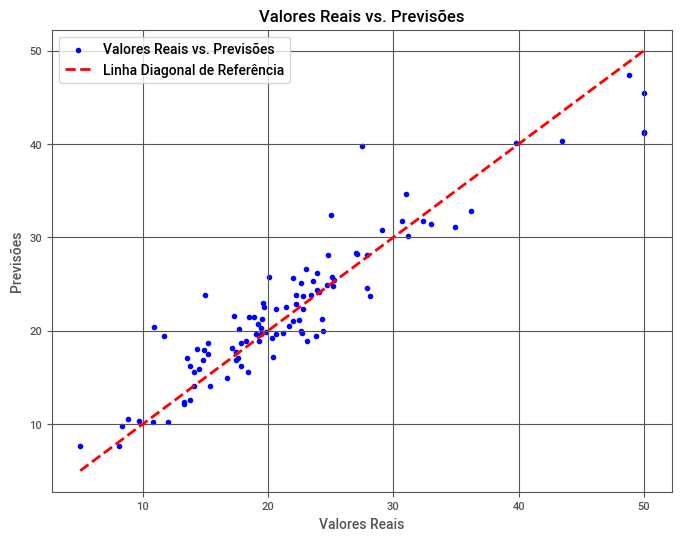

In [1983]:
plt.figure(figsize=(8, 6))

# Plotando os valores reais vs. previsões
plt.scatter(y_teste, y_test_pred, color='blue', label='Valores Reais vs. Previsões')

# Adicionando uma linha diagonal para comparar com o valor real
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linestyle='--', linewidth=2, label='Linha Diagonal de Referência')

plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.legend()
plt.grid(True)
plt.show()

## Visualização dos resíduo das diferentes formas sugeridas

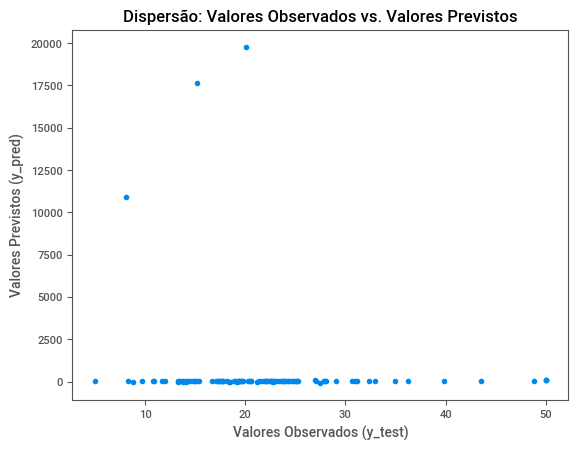

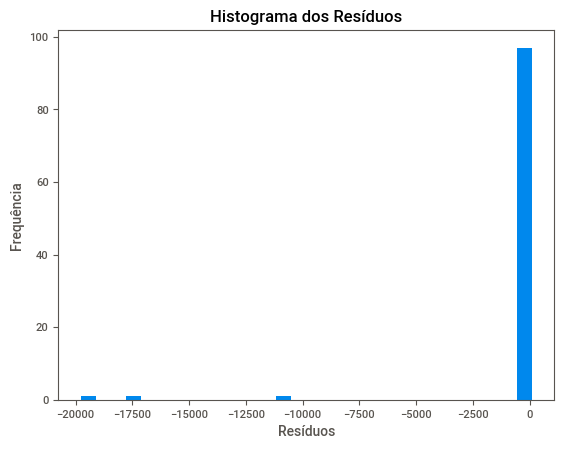

In [1984]:
y_pred = model.predict(X_teste)  # Use o modelo que você treinou

# Crie um gráfico de dispersão y_test vs y_pred
plt.scatter(y_teste, y_pred)
plt.xlabel("Valores Observados (y_test)")
plt.ylabel("Valores Previstos (y_pred)")
plt.title("Dispersão: Valores Observados vs. Valores Previstos")
plt.show()

# Crie um histograma dos resíduos
residuals = y_teste - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

In [1985]:
X_teste_poly = poly_features.transform(X_teste)
y_test_pred = ridge_reg.predict(X_teste_poly)

# Mean Squared Error (Erro Quadrático Médio)
mse = mean_squared_error(y_teste, y_test_pred)
print("Mean Squared Error (MSE):", mse)

# R² Score
r2 = r2_score(y_teste, y_test_pred)
print("R² Score:", r2)

# R² Ajustado
n = len(y_teste)
k = X_teste.shape[1]  # Número de variáveis independentes
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("R² Ajustado:", r2_adjusted)

Mean Squared Error (MSE): 11.048025625837939
R² Score: 0.855854889607413
R² Ajustado: 0.8481875965014243


### Avalie os resultados obtidos de forma textual, respondendo qual é o melhor modelo e o porquê.

O melhor modelo foi o modelo de regressão polinomial do segundo grau, pois ele apresentou o menor erro quadrático médio e o maior R² score.


In [1986]:
# Avaliação com validação cruzada (usando o R²)
scores = cross_val_score(ridge_reg, X_teste, y_teste, cv=5)  # 5 dobras
print("Scores de Validação Cruzada (R²):", scores)

# Média dos scores de validação cruzada
mean_score = scores.mean()
print("Média dos Scores de Validação Cruzada (R²):", mean_score)

Scores de Validação Cruzada (R²): [0.49585011 0.73469807 0.60679675 0.64660382 0.65577823]
Média dos Scores de Validação Cruzada (R²): 0.627945396393683


In [1987]:
# Avaliação com validação cruzada (usando o Erro Absoluto Médio)
scores = cross_val_score(ridge_reg, X_teste, y_teste, cv=5, scoring='neg_mean_absolute_error')
# O 'neg_' antes do nome da métrica indica que estamos avaliando o valor negativo do erro absoluto médio

# Transforme os valores negativos em positivos
scores = -scores

print("Scores de Validação Cruzada (Erro Absoluto Médio):", scores)

# Média dos scores de validação cruzada
mean_score = scores.mean()
print("Média dos Scores de Validação Cruzada (R²):", mean_score)

Scores de Validação Cruzada (Erro Absoluto Médio): [3.89617314 3.6489691  4.48555701 2.94396369 3.27516194]
Média dos Scores de Validação Cruzada (R²): 3.6499649759013466


# Submissão

In [1988]:
df_sub = pd.read_csv('test.csv')
df_sub = df_sub.drop('black', axis=1)

In [1989]:
df_sub.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10


In [1990]:
columt = ['rm','ptratio', 'lstat']
features = df_sub[columt]
features


,rm,ptratio,lstat
0,7.185,17.8,4.03
1,6.430,18.7,5.21
2,6.172,15.2,19.15
3,5.631,15.2,29.93
4,6.004,15.2,17.10
...,...,...,...
168,5.670,19.2,17.60
169,5.390,19.2,21.14
170,6.019,19.2,12.92
171,6.027,19.2,14.33


In [1991]:
id_column = df_sub['ID']
id_column


0        3
1        6
2        8
3        9
4       10
      ... 
168    496
169    497
170    499
171    501
172    505
Name: ID, Length: 173, dtype: int64

In [1992]:
id_column
X_predi = df_sub.drop(columns=['ID','chas', 'dis', 'zn', 'rad', 'age', 'crim', 'nox']).values # Colunas utilizadas: ['nox', 'rm','ptratio', 'lstat']
X_predi

array([[7.070e+00, 7.185e+00, 2.420e+02, 1.780e+01, 4.030e+00],
       [2.180e+00, 6.430e+00, 2.220e+02, 1.870e+01, 5.210e+00],
       [7.870e+00, 6.172e+00, 3.110e+02, 1.520e+01, 1.915e+01],
       [7.870e+00, 5.631e+00, 3.110e+02, 1.520e+01, 2.993e+01],
       [7.870e+00, 6.004e+00, 3.110e+02, 1.520e+01, 1.710e+01],
       [8.140e+00, 5.990e+00, 3.070e+02, 2.100e+01, 1.467e+01],
       [8.140e+00, 5.727e+00, 3.070e+02, 2.100e+01, 1.128e+01],
       [8.140e+00, 5.924e+00, 3.070e+02, 2.100e+01, 1.630e+01],
       [8.140e+00, 5.599e+00, 3.070e+02, 2.100e+01, 1.651e+01],
       [8.140e+00, 5.813e+00, 3.070e+02, 2.100e+01, 1.481e+01],
       [8.140e+00, 6.495e+00, 3.070e+02, 2.100e+01, 1.280e+01],
       [8.140e+00, 6.674e+00, 3.070e+02, 2.100e+01, 1.198e+01],
       [8.140e+00, 5.950e+00, 3.070e+02, 2.100e+01, 2.771e+01],
       [8.140e+00, 5.701e+00, 3.070e+02, 2.100e+01, 1.835e+01],
       [5.960e+00, 5.933e+00, 2.790e+02, 1.920e+01, 9.680e+00],
       [5.960e+00, 5.841e+00, 2.790e+02,

In [1993]:
X_teste_poly = poly_features.transform(X_predi)

# Fazendo previsões nos dados de teste
predictions = lasso_reg.predict(X_teste_poly)


In [1994]:
predictions

array([34.94187697, 26.76015382, 22.27553683, 26.63537699, 21.06684918,
       16.69892449, 16.37928363, 16.15538595, 14.50532921, 15.72987462,
       20.2041245 , 21.69760406, 21.05029444, 15.09028674, 20.14752901,
       18.96268248, 20.0971576 , 30.77713466, 30.5268275 , 29.21123662,
       19.7815117 , 24.62478914, 20.53453232, 20.16926074, 19.90827844,
       21.18447214, 24.27955032, 25.27973123, 25.52649642, 27.41786321,
       41.70047554, 39.83537777, 34.06963578, 18.28777277, 15.07499303,
       18.01815827, 16.21619957, 16.45762842, 16.47824609, 18.99448465,
       12.78715143, 20.0490164 , 21.28074906, 15.90082105, 12.68455588,
       14.3545625 , 14.3853528 , 15.55652945, 16.92393901, 16.84613769,
       18.38509269, 33.25818447, 43.19845371, 22.15870742, 21.07833778,
       24.85599208, 28.39285807, 43.78793036, 34.90366698, 32.65213343,
       30.29647415, 37.79235872, 18.43637823, 18.07576445, 19.34534427,
       18.40111023, 22.43299676, 27.31105712, 20.87710132, 24.98

In [1995]:

output = pd.DataFrame({'Id': id_column, 'medv': predictions})
output.to_csv('submission.csv', index=False)
print("OK")

OK
